## Análise de Gastos Cartão Corporativo Presidencial - 2003 a 2022
link base de dados: https://basedosdados.org/dataset/br-sgp-informacao?bdm_table=despesas_cartao_corporativo
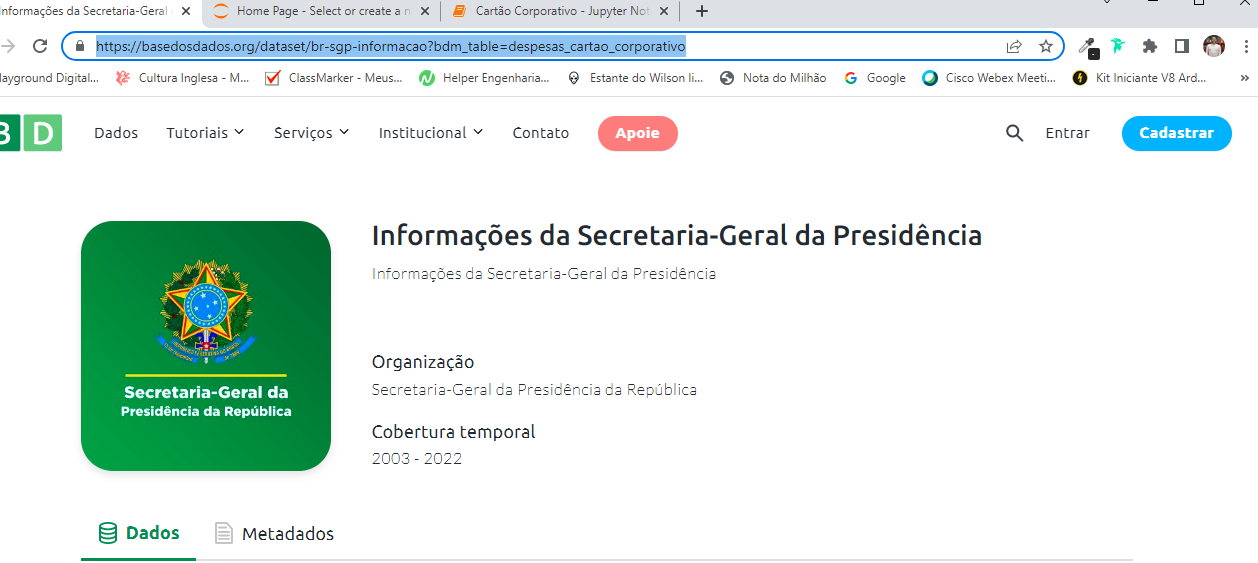

In [1]:
import basedosdados as bd

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
# Para alguma medidas
from scipy.stats import norm

In [5]:
!pip install squarify

In [6]:
# Gráficos
from matplotlib import rc
import matplotlib.pyplot as plt
import squarify

In [7]:
# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_sgp_informacao',
table_id='despesas_cartao_corporativo',
billing_project_id='dataw-372722')

Downloading: 100%|██████████| 113340/113340 [00:21<00:00, 5252.54rows/s]


In [8]:
# Mostrar as cinco primeiras linhas
df.head()

,ano,presidente,data_pagamento,cpf_servidor,cpf_cnpj_fornecedor,nome_fornecedor,tipo,subelemento_despesa,cdic,valor
0,2003,Lula,2003-01-02,***.010.008-**,31349202000177,JW TRANSPORTADORA TURÖSTICA,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,1696.90
1,2003,Lula,2003-01-02,***.010.008-**,31349202000177,JW TRANSPORTADORA TURÖSTICA,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,1336.60
2,2003,Lula,2003-01-02,***.868.251-**,31349202000177,JW TRANSPORTADORA TURÖSTICA,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N,1396.43
3,2003,Lula,2003-01-03,***.004.131-**,00592717000170,FLORES ALVORADA,C,OUTROS SERVI€OS DE TERCEIROS-PESSOA JURÖDICA,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,8585.00
4,2003,Lula,2003-01-03,***.004.131-**,00839308000125,CRISTAL LIMPEZA - COM RCIO DE MATERIAIS PARA L...,C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZA€ÇO,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,251.50


In [9]:
# Mostrar as cinco últimas linhas
df.tail()

,ano,presidente,data_pagamento,cpf_servidor,cpf_cnpj_fornecedor,nome_fornecedor,tipo,subelemento_despesa,cdic,valor
113335,2022,Bolsonaro,2022-12-03,***.136.591-**,17261661005728,OUTBACK STEAKHOUSE RESTAURANTES BRASIL S/A,C,FORNECIMENTO DE ALIMENTA€ÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,179.50
113336,2022,Bolsonaro,2022-12-03,***.136.591-**,39879944000116,BIOMUNDO 105 NORTE COMERCIO DE ALIMENTOS,C,GENEROS DE ALIMENTA€ÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,54.95
113337,2022,Bolsonaro,2022-12-04,***.136.591-**,47508411094975,COMPANHIA BRASILEIRA DE DISTRIBUI€ÇO,C,GENEROS DE ALIMENTA€ÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,518.07
113338,2022,Bolsonaro,2022-12-04,***.136.591-**,12550441000146,RESTAURANTE SOHO,C,FORNECIMENTO DE ALIMENTA€ÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,330.52
113339,2022,Bolsonaro,2022-12-04,***.136.591-**,03696869000100,BIG TRANS COMERCIAL DE ALIMENTOS LTDA,C,GENEROS DE ALIMENTA€ÇO,00264.000642/2022-21.R.08.25/11/2022.31/12/2022.N,54.66


In [10]:
# Mostrar a quantidade de linhas e colunas
df.shape

(113340, 10)

In [11]:
# Mostrar dados estatísticos de um Dataframe
df.describe()

,ano,valor
count,113340.0,113339.000000
mean,2010.751006,1013.678411
std,5.310326,3970.078358
min,2003.0,-1380.360000
25%,2006.0,110.990000
50%,2010.0,288.000000
75%,2015.0,691.275000
max,2022.0,312903.360000


In [12]:
# Informar o nome das colunas, número de linhas e o tipo de dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113340 entries, 0 to 113339
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ano                  113340 non-null  Int64  
 1   presidente           113340 non-null  object 
 2   data_pagamento       113340 non-null  dbdate 
 3   cpf_servidor         113340 non-null  object 
 4   cpf_cnpj_fornecedor  113340 non-null  object 
 5   nome_fornecedor      113340 non-null  object 
 6   tipo                 113340 non-null  object 
 7   subelemento_despesa  113340 non-null  object 
 8   cdic                 113340 non-null  object 
 9   valor                113339 non-null  float64
dtypes: Int64(1), dbdate(1), float64(1), object(7)
memory usage: 8.8+ MB


In [42]:
# CPF Únicos
CPF_Unicos = df['cpf_servidor'].nunique()
print(CPF_Unicos)

155


In [29]:
# Quantidade de CPFs únicos dos presidentes
Qtd_CPFs_Presidente = df.groupby('presidente')['cpf_servidor'].nunique()

In [30]:
print(Qtd_CPFs_Presidente)

presidente
Bolsonaro    22
Dilma        99
Lula         57
Temer        30
Name: cpf_servidor, dtype: int64


In [15]:
Gastos_Presidente = df.groupby('presidente')['valor'].sum()
print(Gastos_Presidente)

presidente
Bolsonaro    27621657.23
Dilma        34409448.76
Lula         43988510.05
Temer         8869681.44
Name: valor, dtype: float64


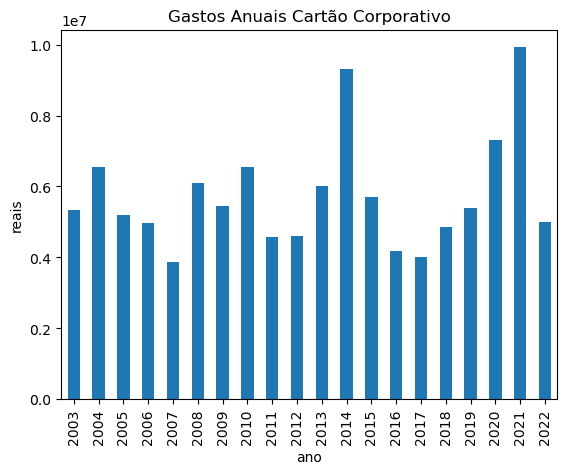

In [16]:
# Crescimento Anual dos gastos com cartão corporativo
df.groupby('ano')['valor'].sum().plot.bar()
plt.title('Gastos Anuais Cartão Corporativo')
plt.ylabel('reais')
plt.show()

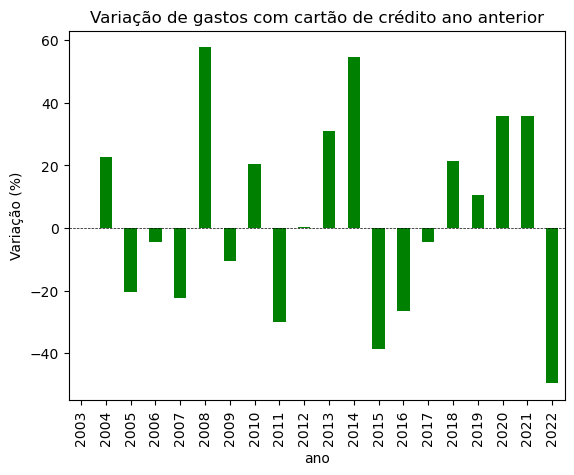

In [17]:
(df.groupby('ano')['valor'].sum().pct_change()*100).plot.bar(color='Green')
plt.axhline(y=0, linewidth=0.5, color='k', ls='--')
plt.title('Variação de gastos com cartão de crédito ano anterior')
plt.ylabel('Variação (%)')
plt.show()

## Observa-se que ocorreu um salto de gastos em 2021

In [18]:
data_col = pd.DatetimeIndex(df['data_pagamento'])

In [19]:
mes = df['mes'] = data_col.month

In [20]:
df.head()

,ano,presidente,data_pagamento,cpf_servidor,cpf_cnpj_fornecedor,nome_fornecedor,tipo,subelemento_despesa,cdic,valor,mes
0,2003,Lula,2003-01-02,***.010.008-**,31349202000177,JW TRANSPORTADORA TURÖSTICA,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,1696.90,1
1,2003,Lula,2003-01-02,***.010.008-**,31349202000177,JW TRANSPORTADORA TURÖSTICA,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.220539/2003-63.R.08.18/12/2002.31/12/2014.N,1336.60,1
2,2003,Lula,2003-01-02,***.868.251-**,31349202000177,JW TRANSPORTADORA TURÖSTICA,D,LOCACAO DE MEIOS DE TRANSPORTE,00200.600539/2003-63.R.08.18/12/2002.31/12/2014.N,1396.43,1
3,2003,Lula,2003-01-03,***.004.131-**,00592717000170,FLORES ALVORADA,C,OUTROS SERVI€OS DE TERCEIROS-PESSOA JURÖDICA,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,8585.00,1
4,2003,Lula,2003-01-03,***.004.131-**,00839308000125,CRISTAL LIMPEZA - COM RCIO DE MATERIAIS PARA L...,C,MATERIAL DE LIMPEZA E PROD. DE HIGIENIZA€ÇO,00200.800212/2003-91.R.08.07/12/2002.31/12/2014.N,251.50,1


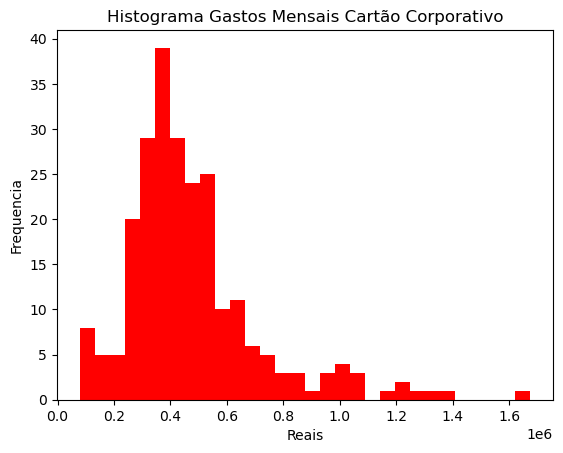

In [38]:
df.groupby(['ano', 'mes'])['valor'].sum().plot.hist(bins=30, color='red')
plt.title('Histograma Gastos Mensais Cartão Corporativo')
plt.xlabel('Reais')
plt.ylabel('Frequencia')
plt.show()

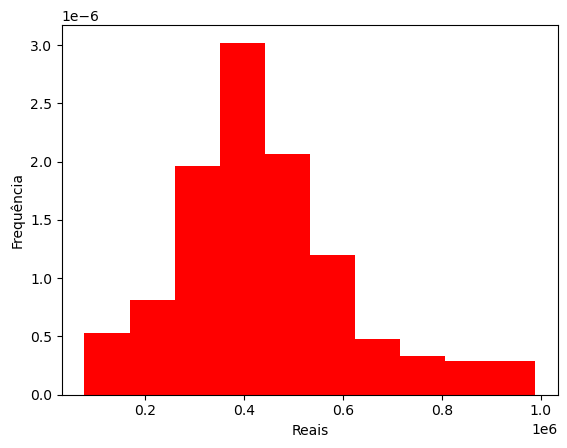

In [39]:
gasto_mensal = df.groupby(['ano', 'mes'])['valor'].sum()
gasto_mensal = gasto_mensal[gasto_mensal<1e6] 
gasto_mensal.plot.hist(bins=10, density=True, color='red')
plt.xlabel('Reais')
plt.ylabel('Frequência')
plt.show()

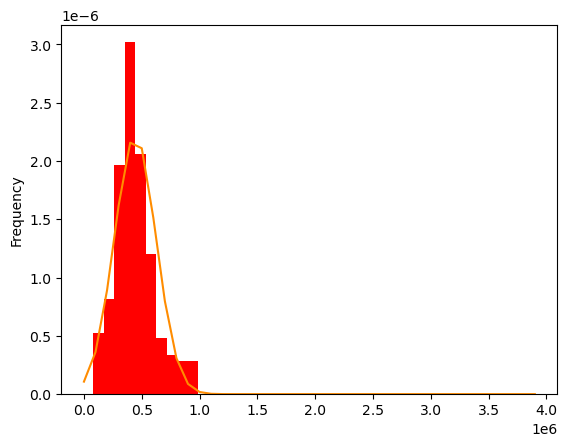

In [40]:
gasto_mensal.plot(kind='hist', density=True, color="red")

lim = np.arange(0, 4*1e6, 1e5)
plt.plot(lim, norm.pdf(lim, gasto_mensal.mean(), gasto_mensal.std(ddof=1)), color="darkorange")
plt.show()

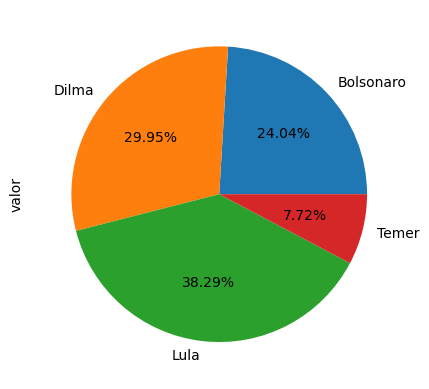

In [76]:
df.groupby('presidente')['valor'].sum().plot.pie(autopct='%1.2f%%')
plt.show()